### exercise b

In [137]:
from numpy import *
from matplotlib.pyplot import *
from matplotlib import gridspec
file_loc = "C:\Users\\vilde\Documents\\vmc_fermions\Output"

font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

import seaborn as sns

sns.set_style('darkgrid')


### Timing - vectorization

In [18]:
print " & CPU time & \\\\ \hline"
print "Run & With vectorization & Without vectorization \\\\ \hline"
    
for i in [1,2,3, 4]:
    file_name = "../Output/exercise_i/with_vectorization_%i.txt"%i
    file_name_2 = "../Output/exercise_i/without_vectorization_%i.txt"%i
    
    cpu_times = genfromtxt(file_name)
    cpu_times_2 = genfromtxt(file_name_2)
    
    print "%i & %.3f & %.3f \\\\"%(i, mean(cpu_times), mean(cpu_times_2))
    

 & CPU time & \\ \hline
Run & With vectorization & Without vectorization \\ \hline
1 & 145.930 & 148.531 \\
2 & 149.653 & 142.881 \\
3 & 155.731 & 153.519 \\
4 & 146.769 & 146.834 \\


### Timing parallell

In [93]:
import re
print "parallelized:"
print "& 1 & 2 & 3 & 4 & Total: \\\\"

usr = zeros((5,4))
system = zeros((5,4))
sum_time = zeros((5,4))

real_total = zeros(5)
usr_total = zeros(5)
sys_total = zeros(5)
tot = zeros(5)
j = 0
for k in [1,2,3,4,5]:
    j = k-1
    
    with open ("../Output/exercise_i/time_1_%i.txt"%k, "r") as myfile: #time%i.txt
        data=myfile.readlines()

    newdata = [{} for i in range(len(data))]
    
    for i in range(len(data)):
        newdata[i] = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",data[i])

    usr[j] = array([float(newdata[0][1]), float(newdata[2][1]), float(newdata[4][1]), float(newdata[6][1])])
    system[j] = array([float(newdata[0][2])*60+float(newdata[0][3]), float(newdata[2][2])*60+float(newdata[2][3]), float(newdata[4][2])*60+float(newdata[4][3]),float(newdata[6][2])*60+float(newdata[6][3])])   

    real_total[j] = float(newdata[9][0])*60+float(newdata[9][1])
    usr_total[j] = float(newdata[10][0])*60+float(newdata[10][1])
    sys_total[j] = float(newdata[11][0])*60+float(newdata[11][1])
    
    sum_time[j] = usr[j]+system[j]
    tot[j] = max(sum_time[j])

    print "& %.3f & %.3f & %.3f & %.3f & %.3f \\\\"%(usr[j][0]+system[j][0], usr[j][1]+system[j][1], usr[j][2]+system[j][2], usr[j][3]+system[j][3], max(sum_time[j]))

print" Mean &  &  &  &  & %.3f \\\\"%(mean(tot))

print "\n Not paralellized:"
for k in [1,2,3,4,5]:
    j = k-1
    
    with open ("../Output/exercise_i/time_2_%i.txt"%k, "r") as myfile:
        data=myfile.readlines()

    newdata = [{} for i in range(len(data))]
    
    for i in range(len(data)):
        newdata[i] = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",data[i])

    real_total[j] = float(newdata[1][0])*60+float(newdata[1][1])
    usr_total[j] = float(newdata[2][0])*60+float(newdata[2][1])
    sys_total[j] = float(newdata[3][0])*60+float(newdata[3][1])
    
print "%.3f"%mean(usr_total+sys_total)

print 602.816/257.922

parallelized:
& 1 & 2 & 3 & 4 & Total: \\
& 200.210 & 200.670 & 202.880 & 203.260 & 203.260 \\
& 331.270 & 332.040 & 332.130 & 332.310 & 332.310 \\
& 276.470 & 277.080 & 279.190 & 279.440 & 279.440 \\
& 226.380 & 229.540 & 230.640 & 231.210 & 231.210 \\
& 235.160 & 240.370 & 242.000 & 243.390 & 243.390 \\
 Mean &  &  &  &  & 257.922 \\

 Not paralellized:
602.816
2.3372027202


In [97]:
degrees(arcsin(125.0/134.629))

68.19871837859881

## Gradient descent

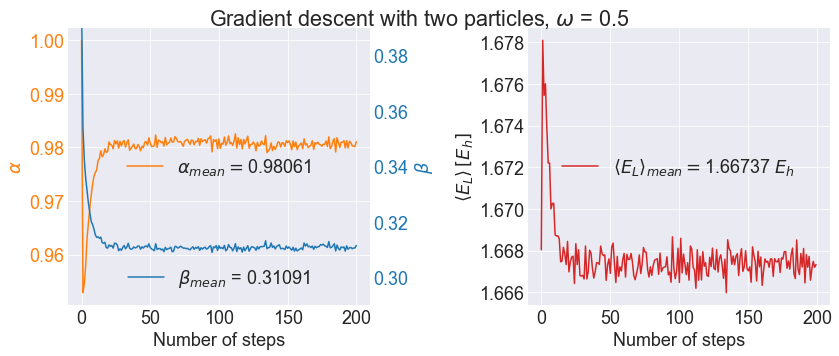

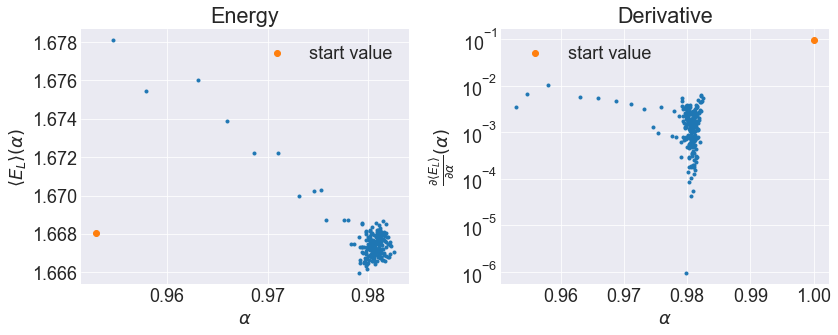

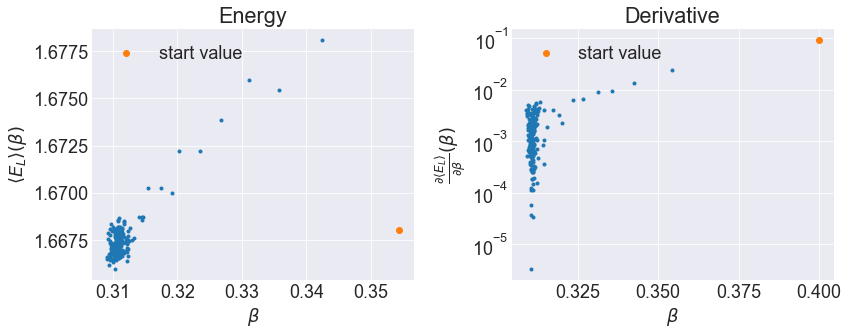

In [351]:
omega = 0.5
gamma = 0.5
alphastart = 1.0

if (omega == 1.0):
    betastart = 0.4
elif (omega == 0.5):
    betastart = 0.4
elif (omega == 0.1):
    betastart = 0.3
elif (omega == 0.05):
    betastart = 0.15
    alphastart = 0.93
    gamma = 0.1
elif (omega == 0.01):
    betastart = 0.1
    alphastart = 0.89
    gamma = 0.1

# X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_interaction_p2_brute_force_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)
X = genfromtxt(file_loc + "\\exercise_e\\gradient_descent_interaction_p2_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)

alpha = X[:,0]
beta = X[:,1]
energy = X[:,2]
derivative_alpha = X[:,3]
derivative_beta = X[:,4]

figure(figsize=(12,5))
suptitle("Gradient descent with two particles, $\omega$ = %.1f"%omega, y=1.005)
ax1 = subplot(1,2,1)
ax2 = twinx(ax1)
ax1.plot(alpha, color="C1", label="$\\alpha_{mean} = $%.5f"%mean(alpha[-50:]))
ax1.set_ylabel("$\\alpha$", color="C1")
ax1.tick_params(axis='y', colors="C1")
ax2.tick_params(axis='y', colors="C0")
ax2.plot(beta, label="$\\beta_{mean}$ = %.5f"%mean(beta[-50:]))
ax2.set_ylabel("$\\beta$", color= "C0")
ax1.legend(loc=10)
ax2.legend(loc=8)
ax2.set_ylim([0.29, 0.39])
ax2.grid(False)
ax1.set_xlabel("Number of steps")
subplot(1,2,2)
plot(energy[1:], color = "C3", label="$\\left<E_L\\right>_{mean} = $%.5f $E_h$"%mean(energy[-50:]))
ylabel( "$\\left<E_L\\right>\,[E_h]$")
xlabel("Number of steps")
legend(loc=10)
tight_layout()
savefig("../Results/example_gradient_descent.png")

figure(figsize=(12,5))
subplot(1,2,1)
plot(alpha[1:], energy[1:], ".")
plot(alpha[1], energy[1], "o", label="start value")
legend()
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\left<E_L\\right>(\\alpha)$")
# axhline(y=3, linestyle="--")
subplot(1,2,2)
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\alpha}(\\alpha)$")
semilogy(alpha, abs(derivative_alpha), ".")
plot(alpha[0], abs(derivative_alpha[0]), "o", label="start value")
title("Derivative")
legend()
tight_layout()

figure(figsize=(12,5))
subplot(1,2,1)
plot(beta[1:], energy[1:], ".")
plot(beta[1], energy[1], "o", label="start value")
title("Energy")
# axhline(y=3, linestyle="--")
xlabel("$\\beta$")
ylabel("$\\left<E_L\\right>(\\beta)$")
legend()
subplot(1,2,2)
semilogy(beta, abs(derivative_beta), ".")
plot(beta[0], abs(derivative_beta[0]), "o", label="start value")
xlabel("$\\beta$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\beta}(\\beta)$")
title("Derivative")
legend()
tight_layout()


## Gradient descent with importance

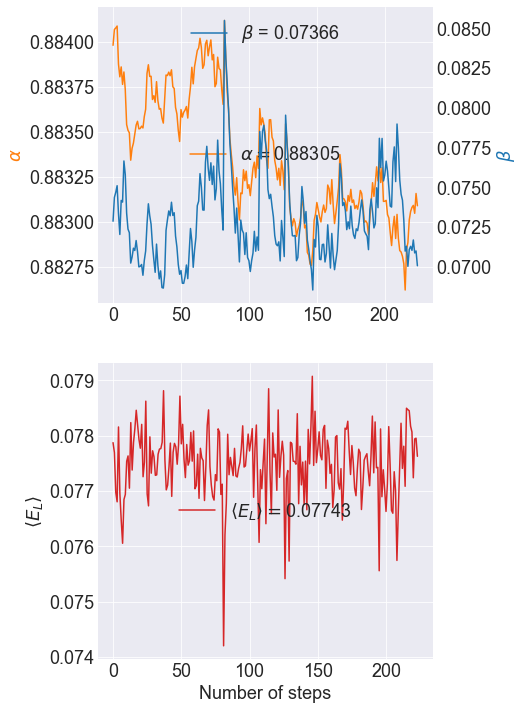

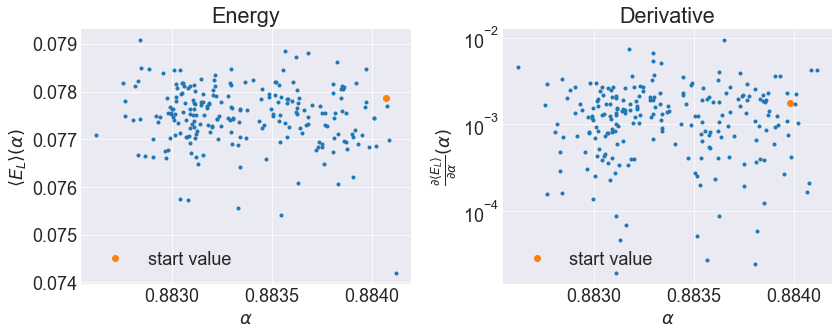

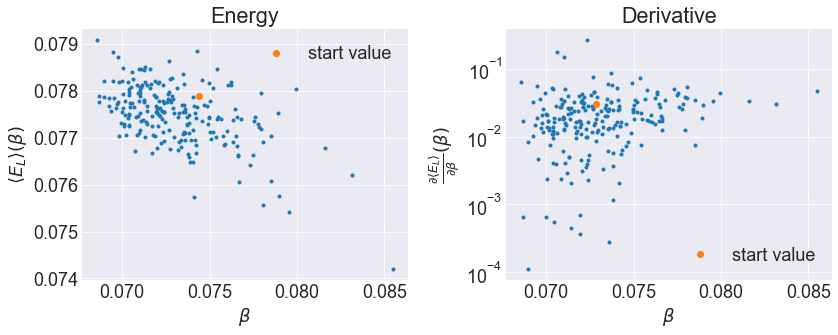

In [121]:
omega = 0.01

gamma = 0.2
alphastart = 1.0
betastart = 0.4

if (omega == 1.0):
    alphastart = 0.95
    betastart = 0.4
    gamma = 0.2
elif (omega == 0.01):
    betastart = 0.08
    alphastart = 0.89
    gamma = 0.05

# X = genfromtxt(file_loc + "\\exercise_f\\gradient_descent_interaction_p2_importance_omega_%i_alphastart_%i_betastart_%i_gamma_%i_long.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)
X = genfromtxt(file_loc + "\\exercise_g\\gradient_descent_interaction_p2_importance_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega*100), int(alphastart*100), int(betastart*100), int(gamma*1000)), skip_header = 1)

alpha = X[:,0]
beta = X[:,1]
energy = X[:,2]
derivative_alpha = X[:,3]
derivative_beta = X[:,4]

figure(figsize=(6,12))
ax1 = subplot(2,1,1)
ax2 = twinx(ax1)
ax1.plot(alpha, color="C1", label="$\\alpha = $%.5f"%mean(alpha[-50:]))
ax1.set_ylabel("$\\alpha$", color="C1")
ax2.plot(beta, label="$\\beta$ = %.5f"%mean(beta[-50:]))
ax2.set_ylabel("$\\beta$", color= "C0")
ax1.legend(loc=10)
ax2.legend(loc=9)
ax2.grid(False)
subplot(2,1,2)
plot(energy[1:], color = "C3", label="$\\left<E_L\\right> = $%.5f"%mean(energy[-50:]))
ylabel( "$\\left<E_L\\right>$")
xlabel("Number of steps")
legend(loc=10)

figure(figsize=(12,5))
subplot(1,2,1)
plot(alpha[1:], energy[1:], ".")
plot(alpha[1], energy[1], "o", label="start value")
legend()
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\left<E_L\\right>(\\alpha)$")
# axhline(y=3, linestyle="--")
subplot(1,2,2)
title("Energy")
xlabel("$\\alpha$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\alpha}(\\alpha)$")
semilogy(alpha, abs(derivative_alpha), ".")
plot(alpha[0], abs(derivative_alpha[0]), "o", label="start value")
title("Derivative")
legend()
tight_layout()

figure(figsize=(12,5))
subplot(1,2,1)
plot(beta[1:], energy[1:], ".")
plot(beta[1], energy[1], "o", label="start value")
title("Energy")
# axhline(y=3, linestyle="--")
xlabel("$\\beta$")
ylabel("$\\left<E_L\\right>(\\beta)$")
legend()
subplot(1,2,2)
semilogy(beta, abs(derivative_beta), ".")
plot(beta[0], abs(derivative_beta[0]), "o", label="start value")
xlabel("$\\beta$")
ylabel("$\\frac{\\partial \\left<E_L\\right>}{\\partial \\beta}(\\beta)$")
title("Derivative")
legend()
tight_layout()


### Gradient descent N = 6

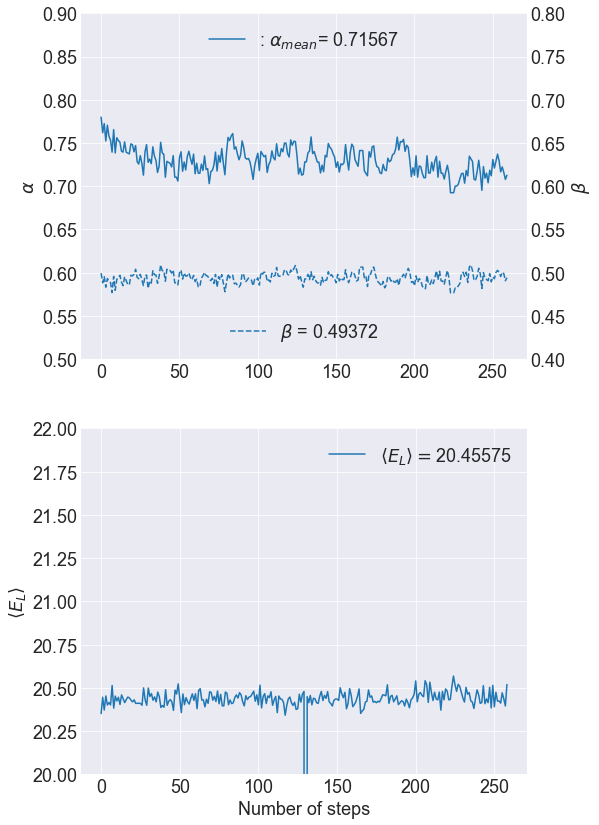

In [107]:
omega = [1.0]
gamma = [0.1]
ast = [80]
bst = [50]

name = [""]

# omega = 0.5
# gamma = [0.1]
# ast = [60]
# bst = [40]

# omega = [0.1, 0.1]
# gamma = [0.02, 0.01]
# ast = [79, 79]
# bst = [22, 22]

# omega = [0.08, 0.07, 0.06, 0.05, 0.04, 0.03]
# gamma = [0.01, 0.01, 0.01, 0.01, 0.01, 0.005]
# ast = [79, 79, 79, 77, 77, 76]
# bst = [15, 14, 13, 13, 11, 10]

# name = ["0.08", "0.07", "0.06", "0.05", "0.04", "0.03]

# omega = [0.02, 0.02, 0.01, 0.01]
# gamma = [0.005, 0.005, 0.005, 0.005]
# ast = [76, 73, 73, 69]
# bst = [9, 9, 8, 8]

# name = ["0.02", "0.02, from ss", "0.01", "0.01, from ss"]

# omega = [0.01, 0.01]
# gamma = [0.005, 0.002]
# ast = [69, 66]
# bst = [8, 6]

# name = ["0.005", "0.002"]

figure(figsize=(8,14))
ax1 = subplot(2,1,1)
ax2 = twinx(ax1)

for y in range(len(ast)):
    
    X = genfromtxt(file_loc + "\\exercise_g\\gradient_descent_interaction_p6_importance_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega[y]*100), ast[y], bst[y], int(gamma[y]*1000)), skip_header = 1)

    alpha = X[:,0]
    beta = X[:,1]
    energy = X[:,2]
    derivative_alpha = X[:,3]
    derivative_beta = X[:,4]
    
#     alpha = alpha[0:125]
#     beta = beta[0:125]
#     energy = energy[0:125]
    

    ax1.plot(alpha, label="%s: $\\alpha_{mean}$= %.5f"%(name[y], mean(alpha[-50:])))
    ax1.set_ylabel("$\\alpha$")
    ax2.plot(beta, "--",label="$\\beta$ = %.5f"%mean(beta[-50:]))
    ax2.set_ylabel("$\\beta$")
    ax1.legend(loc=9)
    ax2.legend(loc=8)
    ax1.set_ylim([0.5,0.9])
    ax2.set_ylim([0.4,0.8])
    ax2.grid(False)
    subplot(2,1,2)
    plot(energy[1:], label="$\\left<E_L\\right> = $%.5f"%mean(energy[-50:]))
    ylim([20.5-0.5,20.5+1.5])
    ylabel( "$\\left<E_L\\right>$")
    xlabel("Number of steps")
    legend()

### Gradient descent - N = 12

-0.18931734
-0.9978855600000002


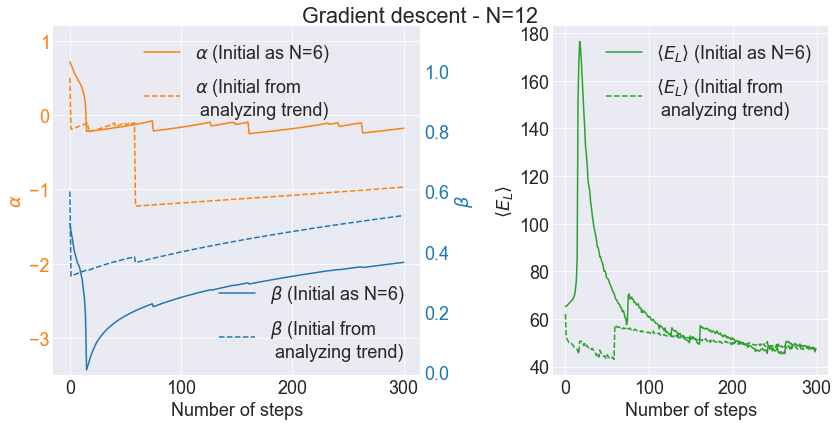

In [167]:
omega = [1.0, 1.0]
gamma = [0.01, 0.05]
ast = [72, 50]
bst = [50, 60]

name = ["Initial as N=6", "Initial from \n analyzing trend", "from former"]

# omega = 0.5
# gamma = [0.1]
# ast = [60]
# bst = [40]

# omega = [0.1, 0.1]
# gamma = [0.02, 0.01]
# ast = [79, 79]
# bst = [22, 22]

# omega = [0.08, 0.07, 0.06, 0.05, 0.04]
# gamma = [0.01, 0.01, 0.01, 0.01, 0.01]
# ast = [79, 79, 79, 77, 77]
# bst = [15, 14, 13, 13, 11]

# name = ["0.08", "0.07", "0.06", "0.05", "0.04"]

# omega = [0.03, 0.02, 0.02]
# gamma = [0.005, 0.005, 0.005]
# ast = [76, 76, 73]
# bst = [10, 9, 9]

# name = ["0.03", "0.02", "0.02, from ss"]

figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 3]) 
ax1 = subplot(gs[0])
ax2 = twinx(ax1)


linetype = ["-", "--"]

for y in range(len(ast)):
    
    X = genfromtxt(file_loc + "\\exercise_g\\gradient_descent_interaction_p12_importance_omega_%i_alphastart_%i_betastart_%i_gamma_%i.txt"%(int(omega[y]*100), ast[y], bst[y], int(gamma[y]*1000)), skip_header = 1)

    alpha = X[:,0]
    beta = X[:,1]
    energy = X[:,2]
    derivative_alpha = X[:,3]
    derivative_beta = X[:,4]
    
#     alpha = alpha[0:125]
#     beta = beta[0:125]
#     energy = energy[0:125]
    
    print mean(alpha[-50:])
    ax1.plot(alpha, linetype[y] ,color = "C1",label="$\\alpha$ (%s)"%name[y])# label="%s: $\\alpha_{mean}$= %.5f"%(name[y], mean(alpha[-50:])))
    ax1.set_ylabel("$\\alpha$", color="C1")
    ax2.plot(beta, linetype[y], color="C0",label="$\\beta$ (%s)"%name[y])#,label="$\\beta$ = %.5f"%mean(beta[-50:]))
    ax2.set_ylabel("$\\beta$", color="C0")
    ax1.legend(loc=9)
    ax2.legend(loc=4)
    ax1.set_ylim([-3.5,1.2])
    ax2.set_ylim([-0.01,1.15])
    ax1.tick_params(axis='y', colors="C1")
    ax2.tick_params(axis='y', colors="C0")
    ax1.set_xlabel("Number of steps")

    ax2.grid(False)
    
    
    ax0 = subplot(gs[1])
    ax0.plot(energy[1:], linetype[y], color="C2",label="$\\left<E_L\\right>$ (%s)"%name[y])# _{mean} = $%.3f"%mean(energy[-100:]))

#     ylim([30, 80])
    ax0.set_ylabel( "$\\left<E_L\\right>$")
    ax0.set_xlabel("Number of steps")
    ax0.legend()
  
    suptitle("Gradient descent - N=12", y=1.0) 
tight_layout()
savefig("../Results/gradient_descent_12p.png")

### Different omegas

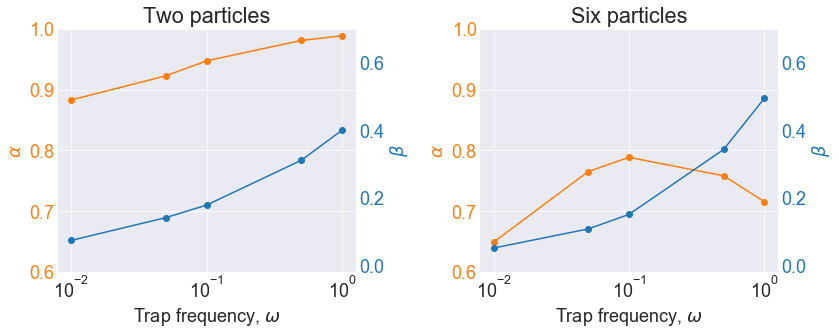

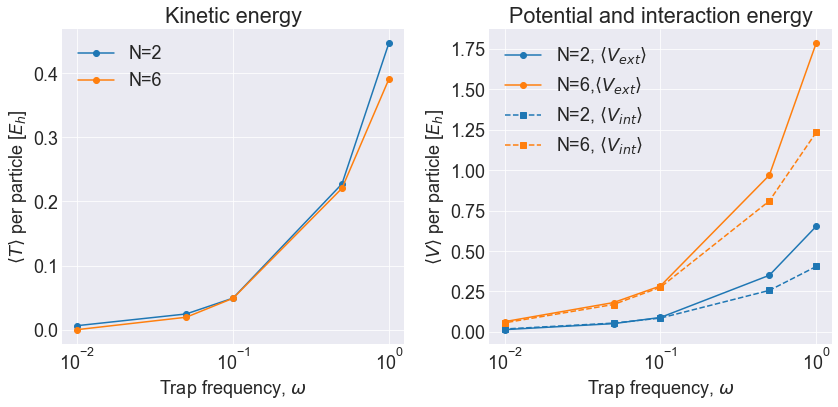

In [464]:
omega = [1.0, 0.5, 0.1, 0.05, 0.01]
# N=2:
alpha = [0.98846, 0.98082, 0.94734, 0.92262, 0.88305]
beta = [0.39954, 0.31068, 0.17810, 0.14090, 0.07366]
mean_distance = [1.64345, 2.48083, 6.72361, 10.3333, 29.2928 ]
E_kin = [0.893123, 0.454685, 0.0988959, 0.0495128, 0.0130627]
E_pot = [1.30517, 0.699729, 0.178708,  0.102437, 0.0283079]
E_int = [0.808643,  0.51295, 0.170973, 0.109083, 0.0362095]

figure(figsize=(12,5))
# subplot(1,2,1)
# title("Two particles")
# plot(omega,alpha, label="alpha")
# plot(omega,beta, label = "beta")
# plot(omega,mean_distance, label="mean distance")
# plot(omega, array(E_kin)/2.0, "o-",  label=" $\\left< T \\right>$ per particle")
# plot(omega, array(E_pot)/2.0,  "o-", label=" $\\left< V_{ext} \\right>$ per particle")
# plot(omega, E_int, label="interaction energy")
# xlabel("Trap frequency, $\omega$")
# legend()

ax1 = subplot(1,2,1)
ax2 = twinx(ax1)
ax1.set_title("Two particles")
ax1.semilogx(omega,alpha, "o-", color="C1")
ax1.set_ylabel("$\\alpha$", color="C1")
ax2.semilogx(omega,beta,"o-")
ax1.tick_params(axis='y', colors="C1")
ax2.tick_params(axis='y', colors="C0")
ax2.set_ylabel("$\\beta$",color= "C0")
ax2.grid(False)
ax1.set_ylim([0.6, 1.0])
ax2.set_ylim([-0.02, 0.7])
ax1.set_xlabel("Trap frequency, $\omega$")
legend(loc=10)


# N=6:
alpha_6 = [0.71567, 0.75823, 0.78852, 0.76518, 0.64907]
beta_6 = [0.49372, 0.34260, 0.15041, 0.10733, 0.05085]
mean_distance_6 = [0, 0, 0, 0, 0]
E_kin_6 = [2.34291, 1.32263,  0.29513, 0.117831, 0.00208272]
E_pot_6 = [10.7076, 5.80937, 1.7035, 1.0882, 0.380349]
E_int_6 = [7.39876, 4.85476, 1.65562, 1.01623, 0.336716]
# ylim([-0.02, 0.7])

# subplot(1,2,2)
# title("Six particles")
# plot(omega,alpha_6, label="alpha")
# plot(omega,beta_6, label = "beta")
# # plot(omega,mean_distance_6, label="mean distance")
# # plot(omega, array(E_kin_6)/6.0, "o-",  label=" $\\left< T \\right>$ per particle")
# # plot(omega, array(E_pot_6)/6.0,  "o-", label=" $\\left< V_{ext} \\right>$ per particle")
# # plot(omega, E_int_6, label="interaction energy")
# xlabel("Trap frequency, $\omega$")
# # ylim([-0.02, 0.7])
# legend()
# tight_layout()

ax1 = subplot(1,2,2)
ax2 = twinx(ax1)
ax1.set_title("Six particles")
ax1.semilogx(omega,alpha_6,"o-", color="C1")
ax1.set_ylabel("$\\alpha$", color="C1")
ax2.semilogx(omega,beta_6,"o-")
ax2.set_ylabel("$\\beta$", color= "C0")
ax2.grid(False)
ax1.set_ylim([0.6, 1.0])
ax2.set_ylim([-0.02, 0.7])
ax1.tick_params(axis='y', colors="C1")
ax2.tick_params(axis='y', colors="C0")
ax1.set_xlabel("Trap frequency, $\omega$")
tight_layout()
savefig("../Results/parameters_compared.png")

figure(figsize=(12,6))
subplot(1,2,1)
title("Kinetic energy")
semilogx(omega, array(E_kin)/2.0, "o-",  label="N=2")
semilogx(omega, array(E_kin_6)/6.0, "o-",  label="N=6")
xlabel("Trap frequency, $\omega$")
ylabel("$\\left< T \\right>$ per particle [$E_h$]")
legend()
subplot(1,2,2)
title("Potential and interaction energy")
semilogx(omega, array(E_pot)/2.0, "o-",  label="N=2, $\\left< V_{ext} \\right> $")
semilogx(omega, array(E_pot_6)/6.0, "o-",  label="N=6,$\\left< V_{ext} \\right> $")
semilogx(omega, array(E_int)/2.0, "s--", color="C0",  label="N=2, $\\left< V_{int} \\right> $")
semilogx(omega, array(E_int_6)/6.0, "s--", color="C1",  label="N=6, $\\left< V_{int} \\right> $")
xlabel("Trap frequency, $\omega$")
ylabel("$\\left< V \\right>$ per particle [$E_h$]")
legend()
tight_layout()
savefig("../Results/energy_per_particle_compared.png")

### Mean distance

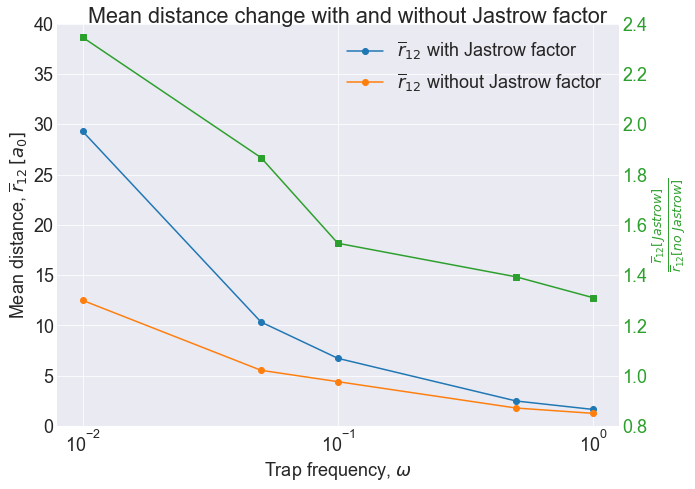

In [350]:
omega = [1.0, 0.5, 0.1, 0.05, 0.01]
no_int = [1.254, 1.781, 4.4046, 5.534, 12.488]
with_int = [1.643, 2.481, 6.724, 10.333, 29.293]

figure(figsize=(10,7))
ax1 = subplot(1,1,1)
ax2 = twinx(ax1)
ax1.semilogx(omega, with_int,"o-", label="$\overline{r}_{12}$ with Jastrow factor")
ax1.semilogx(omega, no_int, "o-", label="$\overline{r}_{12}$ without Jastrow factor")
ax2.semilogx(omega,array(with_int)/array(no_int), "s-", color="C2" )
suptitle("Mean distance change with and without Jastrow factor",y=0.9805)
ax1.set_xlabel("Trap frequency, $\omega$")
ax2.grid(False)
ax1.legend()
ax2.set_ylabel("$\\frac{\overline{r}_{12} [\,Jastrow]}{\overline{r}_{12} [no \,\,Jastrow]}$", color="C2")
ax2.tick_params(axis='y', colors="C2")
ax1.set_ylabel("Mean distance, $\overline{r}_{12} \,[a_0]$")
ax1.set_ylim([0,40])
ax2.set_ylim([0.8,2.4])
tight_layout()
savefig("../Results/mean_distance_change.png")

### One-body density- no interaction

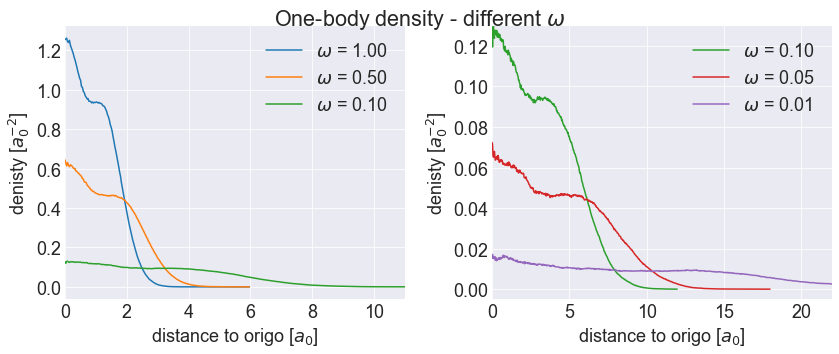

In [490]:
p = 12
omega = [100, 50, 10, 5, 1]

figure(figsize=(12,5))

for o in range(len(omega)):

    # M = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_0_density.txt"%(p,omega))
    R = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_MC_24_densityRadial.txt"%(p,omega[o]))
    # M2 =  genfromtxt(file_loc + "\\exercise_f//ground_state_importance_%ip_omega_%i_alpha_100_1_density.txt"%(p,omega))

    # figure(figsize=(10,8))
    # pcolormesh(M/(2**23))#, vmin=-100, vmax=100)
    # colorbar()
    

    if (omega[o] == 100 and p == 2):
        plot(R[:,0], R[:,1][1]*exp(-R[:,0]**2), label="exact $\propto e^{-r^2}$")
        
#     subplot(1,2,1)
    Rhat = R[:,1] #savitzky_golay(R[:,1], 21, 3)
#     bar(R[:,0], Rhat, width=(R[:,0][-1]/len(Rhat)), label="$\\omega$ = %.2f "%(float(omega[o])/100))
    
#     subplot(1,2,2)
#     bar(R[:,0], Rhat, width=(R[:,0][-1]/len(Rhat)),label="$\\omega$ = %.2f "%(float(omega[o])/100))
    if(o <= 2):
        subplot(1,2,1)
        plot(R[:,0], Rhat, color=colors[o],label="$\\omega$ = %.2f "%(float(omega[o])/100))
    
    if(o >= 2):
        subplot(1,2,2)
        plot(R[:,0], Rhat, color=colors[o],label="$\\omega$ = %.2f "%(float(omega[o])/100))

suptitle("One-body density - different $\\omega$", y=1.0)

subplot(1,2,1)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
legend()
if (p==2):
    xlim([0, 6.0])
elif (p==12):
    xlim([0,11])
else:
    ylim([-0.05, 0.84])
    xlim([0,10.0])
subplot(1,2,2)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
legend()
if (p == 2 ):
    ylim([-0.005, 0.069])
    xlim([0,12])
elif (p == 12):
    ylim([-0.005, 0.13])
    xlim([0,22])
else:
    ylim([-0.005, 0.084])
    xlim([0,20])
tight_layout()
savefig("..//Results/one_body_density_no_interaction_%ip.png"%p)

In [170]:
1e5/(2.0**22)

0.02384185791015625

### One-body density- interaction

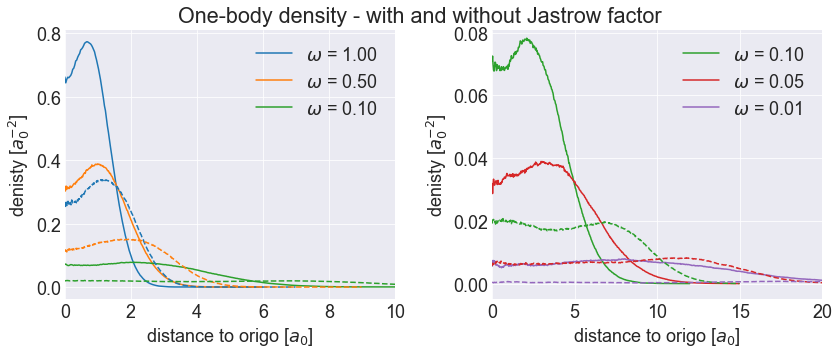

In [484]:
p = 6
omega = [100, 50, 10, 5, 1]

colors = ["C0", "C1", "C2", "C3", "C4"]

figure(figsize=(12,5))

for o in range(len(omega)):

    # M = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_0_density.txt"%(p,omega))

    R = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_MC_24_densityRadial.txt"%(p,omega[o]))

    # figure(figsize=(10,8))
    # pcolormesh(M/(2**23))#, vmin=-100, vmax=100)
    # colorbar()
    

    if (omega[o] == 100 and p == 2):
        plot(R[:,0], R[:,1][5]*exp(-R[:,0]**2), color="C6", label="exact $\propto e^{-r^2}$")
        
    
    Rhat = R[:,1] #savitzky_golay(R[:,1], 21, 3)
    if(o <= 2):
        subplot(1,2,1)
        plot(R[:,0], Rhat, color=colors[o],label="$\\omega$ = %.2f "%(float(omega[o])/100))
    
    if(o >= 2):
        subplot(1,2,2)
        plot(R[:,0], Rhat, color=colors[o],label="$\\omega$ = %.2f "%(float(omega[o])/100))
legend()
subplot(1,2,1)
legend()

for o in range(len(omega)):

    # M = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_0_density.txt"%(p,omega))

    R = genfromtxt(file_loc + "\\exercise_g//one_body/interaction_ground_state_importance_%ip_omega_%i_MC_24_densityRadial.txt"%(p,omega[o]))

    # M2 =  genfromtxt(file_loc + "\\exercise_f//ground_state_importance_%ip_omega_%i_alpha_100_1_density.txt"%(p,omega))

    # figure(figsize=(10,8))
    # pcolormesh(M/(2**23))#, vmin=-100, vmax=100)
    # colorbar()
    

#     if (omega[o] == 100 and p == 2):
#         plot(R[:,0], R[:,1][1]*exp(-R[:,0]**2), label="exact $\propto e^{-r^2}$")
    Rhat = R[:,1] #savitzky_golay(R[:,1], 21, 3)
    if(o <= 2):
        subplot(1,2,1)
        plot(R[:,0], Rhat, "--" , color=colors[o], label="$\\omega$ = %.2f "%(float(omega[o])/100))
    
    if(o >= 2):
        subplot(1,2,2)
        plot(R[:,0], Rhat,"--", color=colors[o], label="$\\omega$ = %.2f "%(float(omega[o])/100))

suptitle("One-body density - with and without Jastrow factor", y=1.0)
subplot(1,2,1)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
if (p == 2 ):
    xlim([0, 6.0])
else:
    xlim([0,10.0])
subplot(1,2,2)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
# legend()
if (p == 2 ):
    ylim([-0.005, 0.074])
    xlim([0,12])
else:
    ylim([-0.005, 0.081])
    xlim([0,10.0*2])
tight_layout()
savefig("..//Results/one_body_density_interaction_%ip.png"%p)

## Exercise d - importance sampling - compare

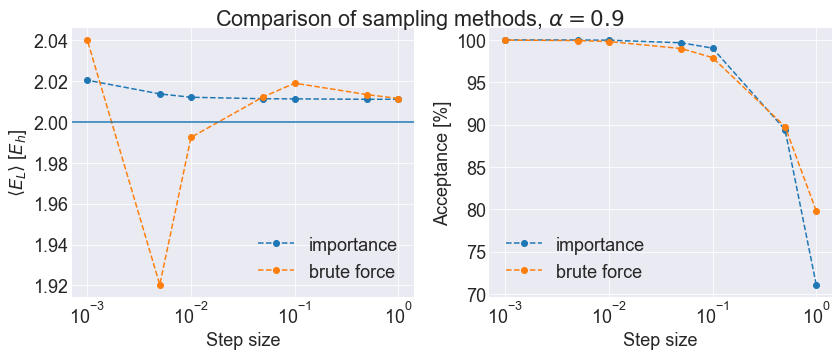

In [257]:
I = loadtxt(file_loc + "\\exercise_d\\analytical_2p_2d_importance.txt", skiprows = 1)
B = loadtxt(file_loc + "\\exercise_d\\analytical_2p_2d_brute_force.txt", skiprows = 1)

figure(figsize=(12,5))
suptitle("Comparison of sampling methods, $\\alpha = 0.9$", y=1.005)
subplot(1,2,1)
semilogx(I[:,0], I[:,2],"o--", label="importance")
semilogx(B[:,0], B[:,2],"o--", label="brute force")
axhline(y=2.0)
xlabel("Step size")
ylabel("$\\left< E_L \\right>$ [$E_h$]")
legend()
subplot(1,2,2)
semilogx(I[:,0], I[:,1],"o--", label="importance")
semilogx(B[:,0], B[:,1],"o--", label="brute force")
xlabel("Step size")
ylabel("Acceptance [%]")
legend()
tight_layout()
savefig("..\Results\comparing_sampling.png")

## Gradient descent - which minimization rate?

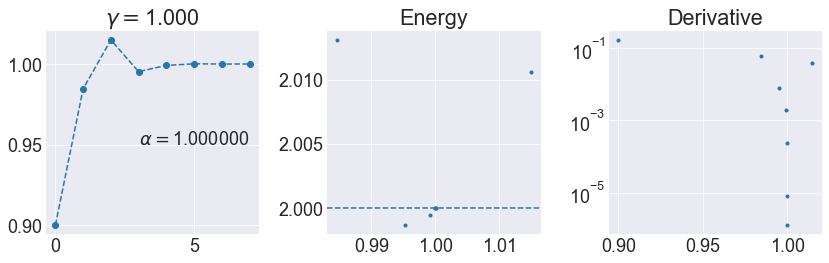

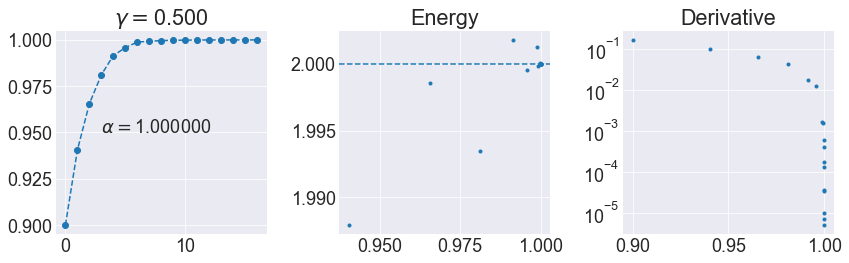

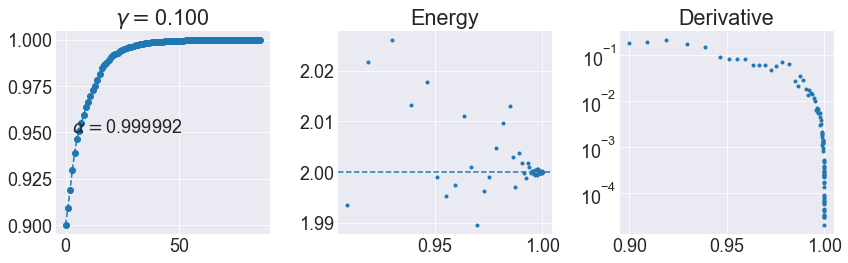

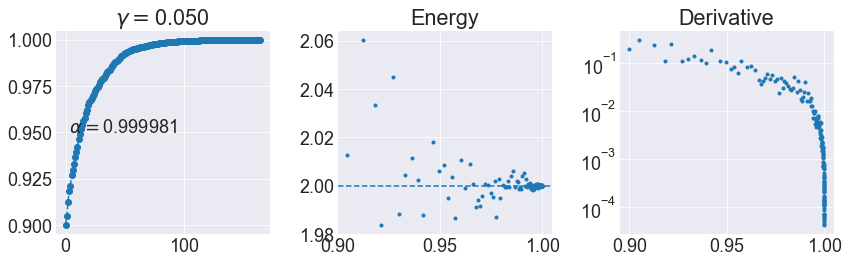

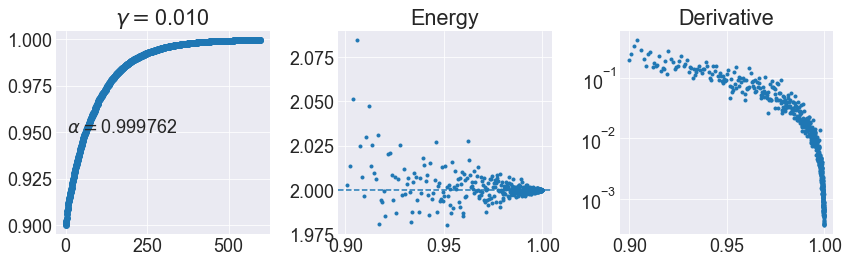

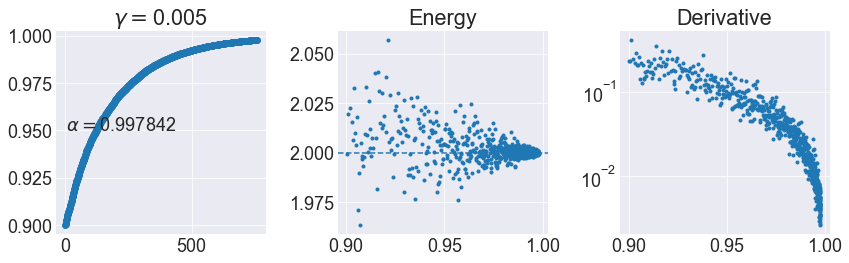

In [279]:
alphastart = [0.9]

gamma = [1.0, 0.5, 0.1, 0.05, 0.01, 0.005]


plotnu = [1,2,3,4,5,6,7,8,9]

for i in range(len(gamma)):
    figure(figsize=(12,4))
    B = loadtxt(file_loc + "\\exercise_e\\gradient_descent_p2_alphastart_%i_gamma_%i.txt"%(int(alphastart[0]*100), int(gamma[i]*1000)), skiprows = 1)
    alpha = B[:,0]
    energy = B[:,1]
    derivative_alpha = B[:,2]
    subplot(1,3,1)
    plot(alpha, "o--")
    title("$\gamma = $%.3f "%(gamma[i]))
    text(3, 0.95, "$\\alpha = $%f"%alpha[-1])
    subplot(1,3,2)
    plot(alpha[1:], energy[1:], ".")
    legend()
    title("Energy")
    axhline(y=2, linestyle="--")
    subplot(1,3,3)
    semilogy(alpha, abs(derivative_alpha), ".")
    title("Derivative")
    tight_layout()


The largest seems to be the best ones. Is that independant of the start value of $\alpha$?

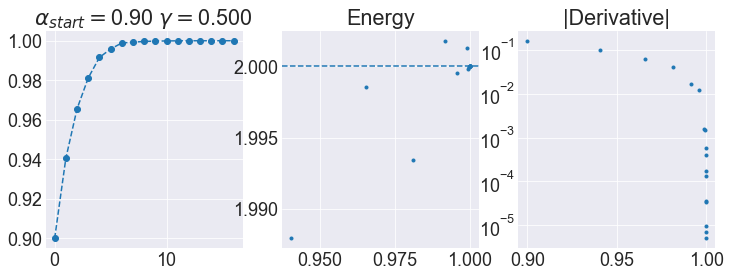

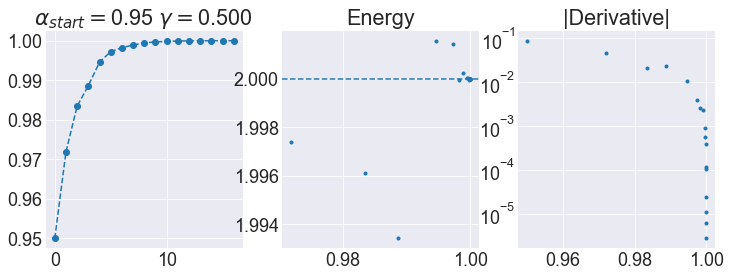

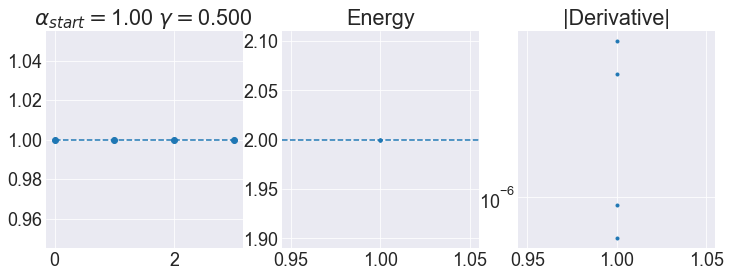

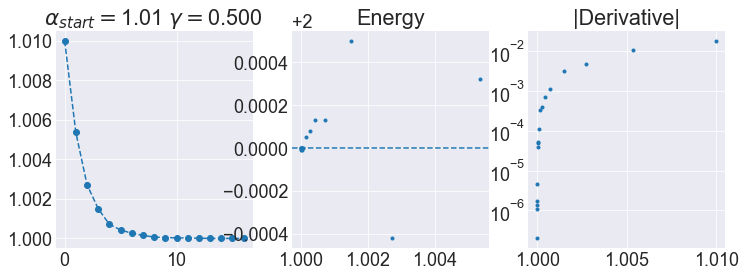

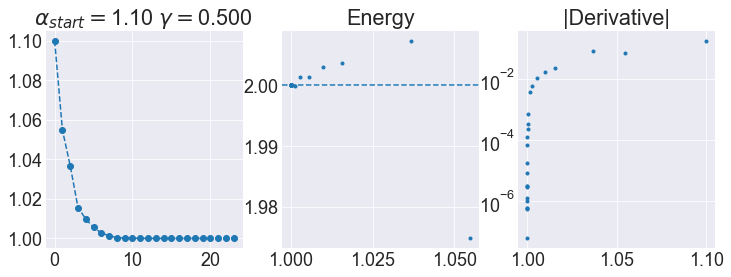

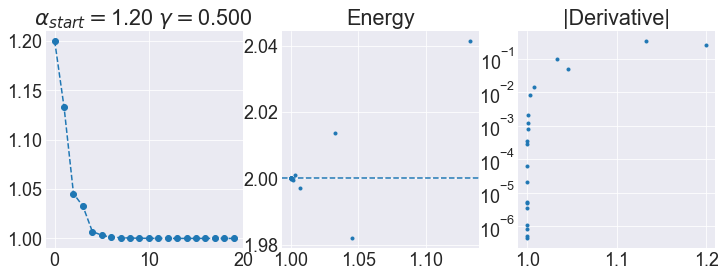

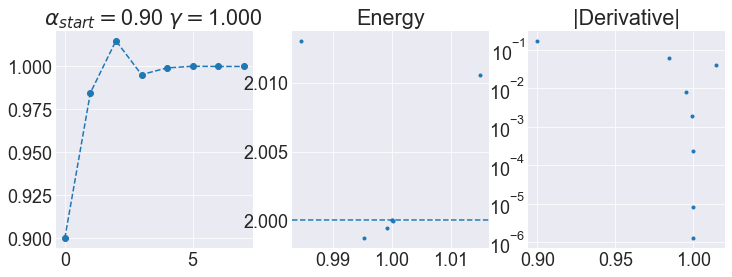

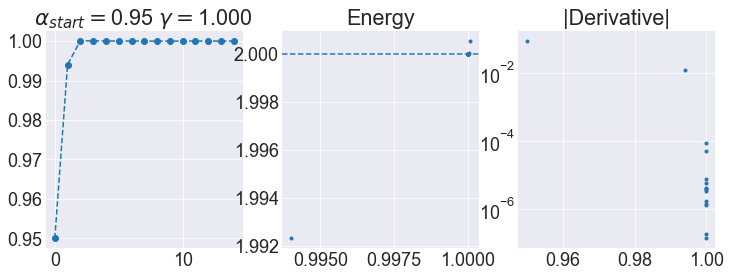

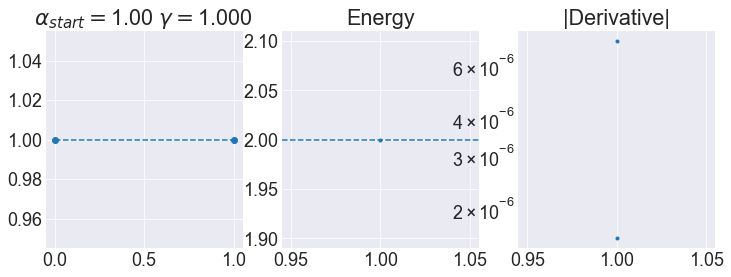

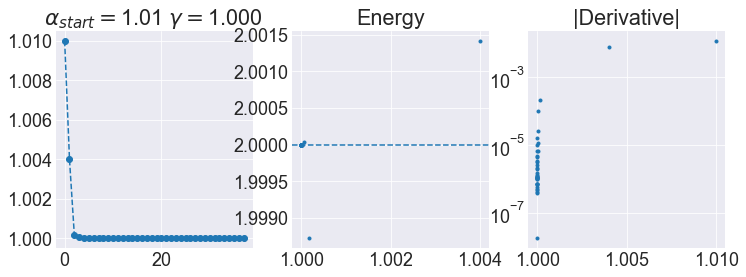

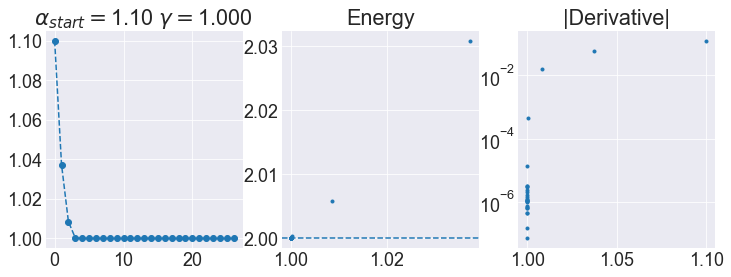

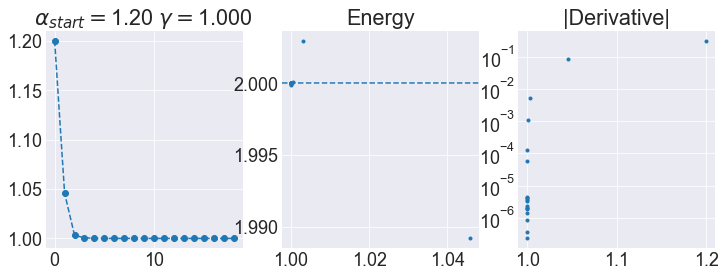

In [286]:
alphastart = [0.9, 0.95, 1.0, 1.01, 1.1, 1.2]

gamma = [0.5, 1.0]

for i in range(len(gamma)):
    
    for k in range(len(alphastart)):
    
        B = loadtxt(file_loc + "\\exercise_e\\gradient_descent_p2_alphastart_%i_gamma_%i.txt"%(int(alphastart[k]*100), int(gamma[i]*1000)), skiprows = 1)
        alpha = B[:,0]
        energy = B[:,1]
        derivative_alpha = B[:,2]
        figure(figsize=(12,4))
        
        subplot(1,3,1)
        plot(alpha, "o--")
        title("$\\alpha_{start} = $%.2f $\gamma = $%.3f "%(alphastart[k], gamma[i]))
        subplot(1,3,2)
        plot(alpha[1:], energy[1:], ".")
        legend()
        title("Energy")
        axhline(y=2, linestyle="--")
        subplot(1,3,3)
        semilogy(alpha, abs(derivative_alpha), ".")
        title("|Derivative|")


It seems like if the guess is close to the correct value for $\alpha$ it is better with the smaller $\gamma = 0.5$. A bigger $\gamma$ could be good if the guess is far away from the correct one, but it seems to me like $\gamma=0.5$ works fairly well for that case too. It is strange that the energy is less than 2.0 for some values of $\alpha$ and some minimization rates. I think something is wrong in the code.

### Checking step sizes

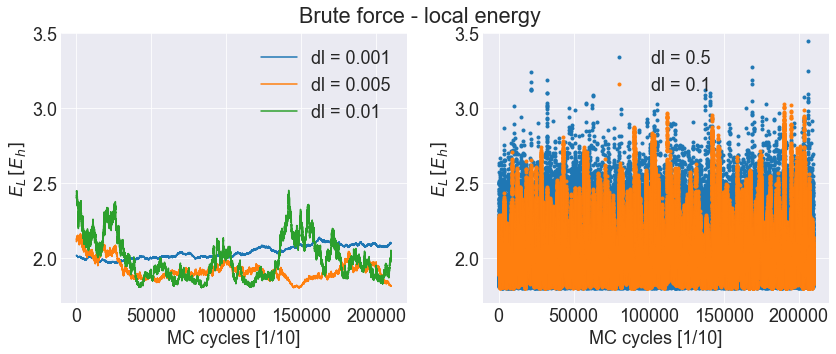

In [258]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_5_MC_21_brute_force_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_1_MC_21_brute_force_energy.txt", skiprows=5)
E3 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_10_MC_21_brute_force_energy.txt", skiprows=5)
# E4 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_50_MC_21_brute_force_energy.txt", skiprows=5)

E_less = E[0::10]
E2_less = E2[0::10]
E3_less = E3[0::10]
# E4_less = E4[0::10]

figure(figsize=(12,5))
suptitle("Brute force - local energy", y=1.00)
subplot(1,2,1)
ylabel("$E_L\, [E_h]$")
xlabel("MC cycles [1/10]")
plot(E2_less, label="dl = 0.001")
plot(E_less, label="dl = 0.005")
plot(E3_less, label="dl = 0.01")
ylim([1.7, 3.5])
# plot(E4_less, label="dl = 0.05")
legend()

E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_500_MC_21_brute_force_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_100_MC_21_brute_force_energy.txt", skiprows=5)

E_less = E[0::10]
E2_less = E2[0::10]

subplot(1,2,2)
# title("Brute force - larger steps")
ylabel("$E_L \,[E_h]$")
xlabel("MC cycles [1/10]")
ylim([1.7, 3.5])
plot(E_less,"." ,label="dl = 0.5")
plot(E2_less,"." ,label="dl = 0.1")
legend()
tight_layout()

savefig("../Results/local_energy_step_sizes.png")

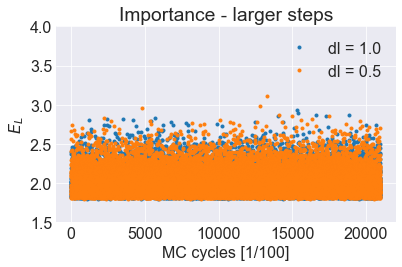

In [6]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_500_MC_21_importance_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_1000_MC_21_importance_energy.txt", skiprows=5)


E_less = E[0::100]
E2_less = E2[0::100]

figure()
title("Importance - larger steps")
ylabel("$E_L$")
xlabel("MC cycles [1/100]")
plot(E2_less,"." ,label="dl = 1.0")
plot(E_less,"." ,label="dl = 0.5")
legend()
tight_layout()
ylim([1.5, 4.0])
savefig("../Results/importance_larger_steps.png")

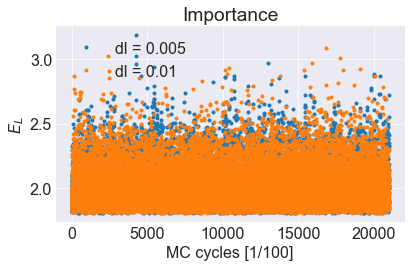

In [5]:
E = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_5_MC_21_importance_energy.txt", skiprows=5)
E2 = loadtxt("../Output//exercise_d//allEnergies//analytical_2d_2p_stepsize_10_MC_21_importance_energy.txt", skiprows=5)


E_less = E[0::100]
E2_less = E2[0::100]

figure()
title("Importance")
ylabel("$E_L$")
xlabel("MC cycles [1/100]")
plot(E_less,"." ,label="dl = 0.005")
plot(E2_less,"." ,label="dl = 0.01")
legend()
tight_layout()
savefig("../Results/importance_smaller_steps.png")

Trying to run for importance sampling and dl = 0.5 to see the differences in the results:

MC = $2^{22}$:

E: 1.98728, 1.98762, 1.98745, 1.98751

MC = $2^{21}$:

E: 1.9877, 1.98796, 1.98755

Tried also some runs with dl = 1.0 and MC = $2^{21}$:

E: 2.01586, 2.01574, 2.01606, 2.01618

### Energy ($\omega$)

Text(0.5,0,u'Trap frequency, $\\omega$')

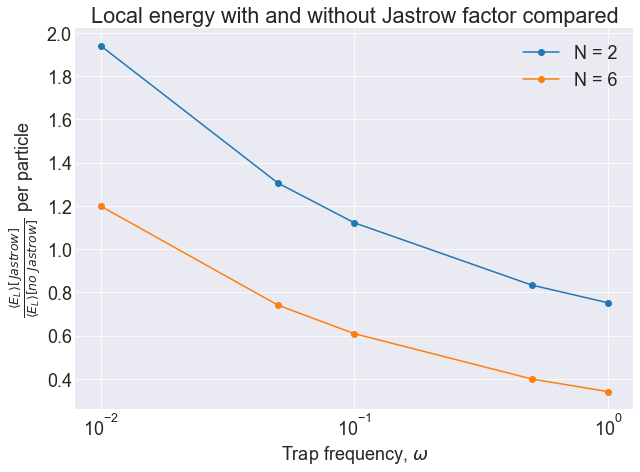

In [238]:
figure(figsize=(10,7))
ax1 = subplot(1,1,1)
# ax2 = twinx(ax1)

omega = [1.0, 0.5, 0.1, 0.05, 0.01]
omega_short = [1.0, 0.5, 0.1, 0.05]

# ----------------
E_2_simp = [2, 1, 0.2, 0.1, 0.02]
E_2 = [3.0069, 1.6674, 0.4486, 0.2610, 0.0776]
T_2 = [0.8931, 0.4547, 0.0989, 0.0495]
V_ex_2 = [1.3052, 0.6997, 0.1787, 0.1024]
E_int_2 = [0.8086, 0.5130, 0.1710, 0.1091]

# E_2_bf = [3.0069, 1.6674,0.4486, 0.2609, 0.0777]
# T_2_bf = [0.8944, 0.4488, 0.1003, 0.0533, 0.0129]
# V_ex_2_bf = [1.2990, 0.7051, 0.1767, 0.0997, 0.0284]
# E_int_2_bf = [0.8135, 0.5135, 0.1716, 0.1076, 0.0364]

E_6_simp = [10, 5, 1, 0.5, 0.1]
E_6 = [20.4492, 11.9868, 3.6542, 2.2223, 0.7191]
T_6 = [2.3429, 1.3226, 0.2951, 0.1178]
V_ex_6 = [10.7076, 5.8094, 1.7035, 1.0882]
E_int_6 = [7.3988, 4.8548, 1.6556, 1.0162]

# E_12 = []
# T_12 = []
# V_ex_12 = []
# E_int_12 = []

ax1.semilogx(omega, (array(E_2)/array(E_2_simp))/2.0, "o-", label="N = 2")
ax1.semilogx(omega, (array(E_6)/array(E_6_simp))/6.0, "o-", label= "N = 6")
ax1.set_ylabel("$\\frac{\\left< E_L \\right>[\,Jastrow]}{\\left< E_L\\right>[no \,\,Jastrow]}$ per particle")
ax1.set_title("Local energy with and without Jastrow factor compared")
ax1.legend()
ax1.set_xlabel("Trap frequency, $\omega$")

In [ ]:
# ax1.plot(omega_short, E_2,"s-", label="N=2, $\\left< E_L \\right>$")
# ax1.plot(omega_short, T_2,"s-", label="N=2, $\\left< T \\right>$")
# ax1.plot(omega_short, V_ex_2,"s-", label="N=2, $\\left< V_{ext} \\right>$")
# ax1.plot(omega_short, E_int_2,"s-", label="N=2, $\\left< V_{int} \\right>$")

# ax2.plot(omega_short, E_6,"o--", label="N=6, $\\left< E_L \\right>$")
# ax2.plot(omega_short, T_6,"o--", label="N=6, $\\left< T \\right>$")
# ax2.plot(omega_short, V_ex_6,"o--", label="N=6, $\\left< V_{ext} \\right>$")
# ax2.plot(omega_short, E_int_6,"o--", label="N=6, $\\left< V_{int} \\right>$")

# plot(omega, E_2_bf, label="N=2, $\\left< E_L \\right>$ (bf)")
# plot(omega, T_2_bf, label="N=2, $\\left< T \\right>$ (bf)")
# plot(omega, V_ex_2_bf, label="N=2, $\\left< V_{ext} \\right>$ (bf)")
# plot(omega, E_int_2_bf, label="N=2, $\\left< V_{int} \\right>$ (bf)")
# ax1.legend(loc=6)
# ax2.grid(False)
# ax2.legend()
# -----------------
# figure(figsize=(10,8))
# ax1 = subplot(1,1,1)
# ax2 = twinx(ax1)
# ax3 = twinx(ax1)

# # E_2 = [2, 1, 0.2, 0.1, 0.02]
# # T_2 = [1.0008, 0.4971, 0.0996, 0.0497, 0.0099]
# # V_2 = [0.9992, 0.5029, 0.1004, 0.0503, 0.0101]

# E_2_im = [2, 1, 0.2, 0.1, 0.02]
# T_2_im = [0.9982, 0.4973, 0.0987, 0.0512, 0.0101]
# V_2_im = [1.0018, 0.5027, 0.1013, 0.0488, 0.0099]

# E_6 = [10, 5, 1, 0.5, 0.1]
# T_6 = [4.9865, 2.4973, 0.4861, 0.2483, 0.0454]
# V_6 = [5.0135, 2.5027, 0.5139, 0.2517, 0.0546]

# E_12 = [28, 14, 2.8, 1.4, 0.28]
# T_12 = [14.0117, 7.0463, 1.4084, 0.6901, 0.1419]
# V_12 = [13.9883, 6.9537, 1.3916, 0.7099, 0.1381]

# ax1.plot(omega, E_2_im,"s-", label="N=2, $\\left< E_L \\right>$")
# ax1.plot(omega, T_2_im,"s-", label="N=2, $\\left< T \\right>$")
# ax1.plot(omega, V_2_im,"s-", label="N=2, $\\left< V_{ext} \\right>$")


# ax2.plot(omega, E_6,"o-", label="N=6, $\\left< E_L \\right>$")
# ax2.plot(omega, T_6,"o-", label="N=6, $\\left< T \\right>$")
# ax2.plot(omega, V_6,"o-", label="N=6, $\\left< V_{ext} \\right>$")


# ax3.plot(omega, E_12,"<-", label="N=12, $\\left< E_L \\right>$")
# ax3.plot(omega, T_12,"<-", label="N=12, $\\left< T \\right>$")
# ax3.plot(omega, V_12,"<-", label="N=12, $\\left< V_{ext} \\right>$")

# ax2.grid(False)
# ax3.grid(False)

# ax2.legend()
# ax1.legend()
# ax3.legend()

### One-body denisty - fixed with smoothing

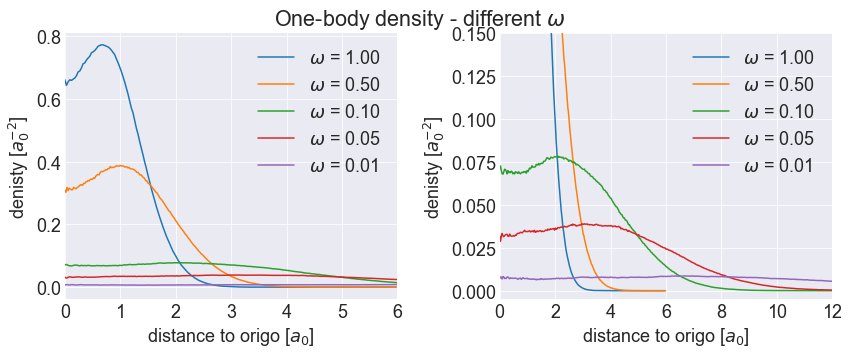

In [429]:
p = 6
omega = [100, 50, 10, 5, 1]

figure(figsize=(12,5))

for o in range(len(omega)):

    # M = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_0_density.txt"%(p,omega))
    R = genfromtxt(file_loc + "\\exercise_f//one_body//ground_state_importance_%ip_omega_%i_alpha_100_MC_24_densityRadial.txt"%(p,omega[o]))
    # M2 =  genfromtxt(file_loc + "\\exercise_f//ground_state_importance_%ip_omega_%i_alpha_100_1_density.txt"%(p,omega))

    # figure(figsize=(10,8))
    # pcolormesh(M/(2**23))#, vmin=-100, vmax=100)
    # colorbar()
    

    if (omega[o] == 100 and p == 2):
        plot(R[:,0], R[:,1][1]*exp(-R[:,0]**2), label="exact $\propto e^{-r^2}$")
        
    subplot(1,2,1)
    Rhat = R[:,1]# savitzky_golay(R[:,1][1:], 51, 3)
    plot(R[:,0], array(Rhat), label="$\\omega$ = %.2f "%(float(omega[o])/100))
    
    subplot(1,2,2)
    plot(R[:,0], Rhat, label="$\\omega$ = %.2f "%(float(omega[o])/100))

suptitle("One-body density - different $\\omega$", y=1.0)

subplot(1,2,1)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
legend()
xlim([0, 6.0])
subplot(1,2,2)
ylabel("denisty [$a_0^{-2}$]")
xlabel("distance to origo [$a_0$]")
legend()
if (p == 2 ):
    ylim([-0.005, 0.074])
    xlim([0,12])
else:
    ylim([-0.005, 0.15])
    xlim([0,12])
tight_layout()
savefig("..//Results/one_body_density_no_interaction_%ip_smoothed.png"%p)

In [362]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')